In [1]:
import pandas as pd
import pandas_profiling
import numpy as np
from pyxlsb import open_workbook
import matplotlib.pyplot as plt

In [2]:
df=[]
with open_workbook('EXL_EQ_2020_Train_datasets.xlsb') as wb:
    with wb.get_sheet('Train Sample') as sheet:
        for row in sheet.rows():
            df.append([item.v for item in row])

df1 = pd.DataFrame(df[1:], columns=df[0])

In [3]:
df1.head()

,cust_id,var1,var2,var3,var4,var5,var6,var7,var8,var9,...,var32,var33,var34,var35,var36,var37,var38,var39,var40,self_service_platform
0,100001.0,2667.0,0.0,0.0,1768.0,0.0,4.0,0.0,2.0,291016.0,...,0.0,other,Inactive,Standard,Video/Internet/Voice,N,None,Single Housing,N,Desktop
1,100002.0,435.0,0.0,0.0,515.0,0.0,3.0,0.0,0.0,137667.0,...,0.0,other,Never,Standard,Video/Internet,N,None,Single Housing,N,Desktop
2,100003.0,1520.0,0.0,0.0,2280.0,0.0,6.0,0.0,4.0,301567.0,...,0.0,other,Inactive,Standard,Video/Internet/Voice,N,Agent,Single Housing,Y,Desktop
3,100004.0,4393.0,0.0,1.0,5731.0,0.0,8.0,1.0,27.0,436735.0,...,1.0,other,Active,Standard,Internet Only,None,None,Single Housing,N,Desktop
4,100005.0,3587.0,0.0,0.0,2493.0,0.0,7.0,0.0,7.0,314970.0,...,0.0,movie_channel1,Never,Standard,Internet Only,N,None,Multi Housing,N,STB


In [4]:
df1.shape

(300000, 38)

In [5]:
for i in df1.columns:
    print(df1[i].head(1))

0    100001.0
Name: cust_id, dtype: float64
0    2667.0
Name: var1, dtype: float64
0    0.0
Name: var2, dtype: float64
0    0.0
Name: var3, dtype: float64
0    1768.0
Name: var4, dtype: float64
0    0.0
Name: var5, dtype: float64
0    4.0
Name: var6, dtype: float64
0    0.0
Name: var7, dtype: float64
0    2.0
Name: var8, dtype: float64
0    291016.0
Name: var9, dtype: float64
0    0.0
Name: var10, dtype: float64
0    0.0
Name: var11, dtype: float64
0    109.0
Name: var12, dtype: float64
0    447.0
Name: var13, dtype: float64
0    0.0
Name: var14, dtype: float64
0    161.0
Name: var15, dtype: float64
0    0.0
Name: var16, dtype: float64
0    9.0
Name: var21, dtype: float64
0    85287.0
Name: var22, dtype: float64
0    27.0
Name: var23, dtype: float64
0    0.0
Name: var24, dtype: float64
0    0.0
Name: var25, dtype: float64
0    4.0
Name: var26, dtype: float64
0    153.0
Name: var27, dtype: float64
0    0.0
Name: var28, dtype: float64
0    0.0
Name: var29, dtype: float64
0    .
Name: var

In [6]:
# for text columns
print(df1['var30'].value_counts())
print(df1['var33'].value_counts())
print(df1['var34'].value_counts())
print(df1['var35'].value_counts())
print(df1['var36'].value_counts()) #na
print(df1['var37'].value_counts()) #na
print(df1['var38'].value_counts()) #na
print(df1['var39'].value_counts()) #na
print(df1['var40'].value_counts())
print(df1['self_service_platform'].value_counts())

.    300000
Name: var30, dtype: int64
other                     272972
news_channel1               8285
news_channel2               6062
entertainment_channel1      5563
entertainment_channel2      4904
movie_channel1              2214
Name: var33, dtype: int64
Never        105758
Pending      104447
Active        48580
Inactive      34526
Cancelled      6689
Name: var34, dtype: int64
Standard               283150
CreditCard              10127
Electronic Transfer      6723
Name: var35, dtype: int64
Video/Internet                       104654
Video/Internet/Voice                  98173
Internet Only                         63010
Video Only                             9195
Internet/Voice                         8072
Video/Internet/Voice/Homesecurity      5603
Video/Internet/Homesecurity            5153
Internet/Homesecurity                   714
Video/Voice                             359
Homesecurity Only                       160
Internet/Voice/Homesecurity             154
Voice Only  

In [7]:
df1.isnull().any()

cust_id                  False
var1                     False
var2                     False
var3                     False
var4                     False
var5                     False
var6                     False
var7                     False
var8                     False
var9                     False
var10                    False
var11                    False
var12                    False
var13                    False
var14                    False
var15                    False
var16                    False
var21                    False
var22                    False
var23                    False
var24                     True
var25                    False
var26                    False
var27                    False
var28                    False
var29                    False
var30                    False
var31                    False
var32                    False
var33                    False
var34                    False
var35                    False
var36   

In [8]:
'''
columns that have nan values are var24, var36, var37, var38, var39
'''

print(df1['var24'].unique())
print(df1['var36'].unique())
print(df1['var37'].unique())
print(df1['var38'].unique())
print(df1['var39'].unique())

[  0.  20.  33.   7.  30.   3.  21.  42. 117.   8.  nan   1.  13. 112.
  14.   2.  17.  35.  37.  27.  28.  50.  67.  31.  40.  34.   4. 106.
  16.  41.  47.  74.  52.  64.  39.   9.  60.  59.  12.  19.  43.  68.
 132.  15.  11.  81.  25.  92.   5.  26.  82.  18.  45.  53.   6.  61.
  90.  23.  38.  44.  32.  36.  58.  70.  94.  29.  10.  54.  22.  46.
  48.  65. 104.  77. 103.  55.  57.  24.  49. 110.  97. 114. 109. 136.
  96. 107. 102.  80. 125.  85.  88.  75.  56.  72.  79.  71. 123. 118.
 122. 113.  99. 134.  62. 105.  83. 108.  63. 126. 135. 120.  86.  91.
 131.  76. 100.  93. 101. 121.  89.  51.  69. 124. 147.  87.  73. 115.
 111.  66. 119.  98.  84. 116.  95.  78. 130. 128. 145. 133. 142. 127.
 137. 146. 141. 129. 139. 144. 140. 148. 138. 143.]
['Video/Internet/Voice' 'Video/Internet' 'Internet Only' 'Internet/Voice'
 None 'Video Only' 'Homesecurity Only' 'Video/Internet/Voice/Homesecurity'
 'Internet/Homesecurity' 'Video/Internet/Homesecurity' 'Video/Voice'
 'Internet/Voice/Hom

In [9]:
#count of null values 
print(df1['var24'].isnull().sum()) 
print(df1['var36'].isnull().sum())
print(df1['var37'].isnull().sum())
print(df1['var38'].isnull().sum())
print(df1['var39'].isnull().sum())
print(df1.shape)

9916
4633
19442
185152
22
(300000, 38)


In [10]:
# for var 36 => mode for imputation
df1['var36'].fillna('Video/Internet',inplace = True)


In [11]:
# for var24
# Count of emails sent (in last 60 Days) where Scherp has been the internet provider
types = ['Video/Internet/Voice','Video/Internet','Internet Only','Internet/Voice',
         'Video/Internet/Voice/Homesecurity',
         'Internet/Homesecurity','Video/Internet/Homesecurity',
         'Internet/Voice/Homesecurity']
print(df1.groupby(['var24','var36'])['var24'].mean())
# imputing with zeros
df1['var24'].fillna(0.00,inplace = True)



var24  var36                      
0.0    Homesecurity Only                0.0
       Internet Only                    0.0
       Internet/Homesecurity            0.0
       Internet/Voice                   0.0
       Internet/Voice/Homesecurity      0.0
                                      ...  
148.0  Internet/Voice                 148.0
       Video Only                     148.0
       Video/Internet                 148.0
       Video/Internet/Homesecurity    148.0
       Video/Internet/Voice           148.0
Name: var24, Length: 1201, dtype: float64


In [12]:
df1['var37'].fillna('N',inplace = True)


In [13]:
df1['var38'].fillna('Other',inplace = True)

In [14]:
df1['var39'].fillna('Single Housing', inplace = True)

In [15]:
print(df1['var24'].value_counts())
print(df1['var36'].value_counts())
print(df1['var37'].value_counts())
print(df1['var38'].value_counts())
print(df1['var39'].value_counts())

0.0      156006
1.0       33185
20.0      11866
21.0      11215
14.0       5262
          ...  
145.0        18
148.0        17
143.0        16
146.0        16
135.0        12
Name: var24, Length: 149, dtype: int64
Video/Internet                       109287
Video/Internet/Voice                  98173
Internet Only                         63010
Video Only                             9195
Internet/Voice                         8072
Video/Internet/Voice/Homesecurity      5603
Video/Internet/Homesecurity            5153
Internet/Homesecurity                   714
Video/Voice                             359
Homesecurity Only                       160
Internet/Voice/Homesecurity             154
Voice Only                              107
Video/Homesecurity                       10
Video/Voice/Homesecurity                  3
Name: var36, dtype: int64
N    295302
Y      4698
Name: var37, dtype: int64
Other           221433
Agent            65235
Self Service     13332
Name: var38, dtype: int6

In [16]:
# df1.isnull().any()

In [17]:
# for i in df1.columns:
#     print(df1[i].head(1))

## Pandas Profiling

In [18]:
# profile = pandas_profiling.ProfileReport(df1)

In [19]:
# profile.to_file(output_file="eda_round_1.html")

In [20]:
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

## Random forest classification

In [21]:
#Auto encodes any dataframe column of type category or object.
def dummyEncode(df):
        columnsToEncode = list(df.select_dtypes(include=['category','object']))
        le = LabelEncoder()
        print ("sdgad")
        for feature in columnsToEncode:
            try:
                df[feature] = le.fit_transform(df[feature])
                print (feature)
                print (le.classes_)
                print ("\n")
            except:
                print('Error encoding '+feature)
        return df

In [22]:
def splitXY(df):
    return [df_encoded.loc[:, 'var1':'var40'], df_encoded["self_service_platform"]]

In [23]:
df_encoded = dummyEncode(df1)

sdgad
var30
['.']


var33
['entertainment_channel1' 'entertainment_channel2' 'movie_channel1'
 'news_channel1' 'news_channel2' 'other']


var34
['Active' 'Cancelled' 'Inactive' 'Never' 'Pending']


var35
['CreditCard' 'Electronic Transfer' 'Standard']


var36
['Homesecurity Only' 'Internet Only' 'Internet/Homesecurity'
 'Internet/Voice' 'Internet/Voice/Homesecurity' 'Video Only'
 'Video/Homesecurity' 'Video/Internet' 'Video/Internet/Homesecurity'
 'Video/Internet/Voice' 'Video/Internet/Voice/Homesecurity' 'Video/Voice'
 'Video/Voice/Homesecurity' 'Voice Only']


var37
['N' 'Y']


var38
['Agent' 'Other' 'Self Service']


var39
['Commercial' 'Exclude mapping' 'Multi Housing' 'Other' 'Single Housing']


var40
['N' 'Y']


self_service_platform
['Desktop' 'Mobile App' 'Mobile Web' 'STB']




In [24]:
X,y=splitXY(df_encoded)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [25]:
y_train

50834     3
279350    0
199412    0
85326     1
231192    2
         ..
119879    3
259178    1
131932    0
146867    3
121958    2
Name: self_service_platform, Length: 201000, dtype: int64

In [26]:
clf = RandomForestClassifier(max_depth=5, random_state=0, class_weight="balanced")

In [27]:
clf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight='balanced',
                       criterion='gini', max_depth=5, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [28]:
print(clf.feature_importances_)

[7.83182276e-02 6.93292658e-03 6.03304206e-02 2.16226940e-02
 7.31948894e-03 9.04716117e-02 3.07547262e-02 3.83945581e-02
 5.96437998e-02 6.78772836e-02 1.50149557e-02 1.62531947e-02
 1.53984720e-02 1.94359814e-02 3.96284241e-02 0.00000000e+00
 5.44638295e-02 7.29184307e-02 3.48145472e-02 2.56153053e-02
 0.00000000e+00 2.30549629e-02 3.72043037e-02 3.89561502e-02
 5.02570772e-02 0.00000000e+00 1.46145821e-03 8.22955188e-02
 9.23609729e-05 3.26286896e-04 7.01250188e-05 5.31574494e-03
 2.05873696e-05 1.11100859e-03 3.33527676e-05 4.59218475e-03]


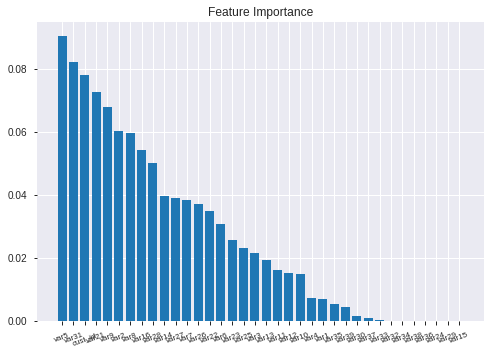

In [29]:
indices = np.argsort(clf.feature_importances_)[::-1]
names = [df1.columns[i] for i in indices]

plt.bar(range(X.shape[1]), clf.feature_importances_[indices])
# Add feature names as x-axis labels
plt.xticks(range(X.shape[1]), names, rotation=20, fontsize = 8)
# Create plot title
plt.title("Feature Importance")
# Show plot
plt.show()

In [30]:
y_pred = clf.predict(X_test)
print (clf.score(X_test, y_test))

0.6744242424242424


In [31]:
print(classification_report(y_test, y_pred)) # Class balance

              precision    recall  f1-score   support

           0       0.80      0.77      0.78     60632
           1       0.62      0.50      0.55     18441
           2       0.41      0.61      0.49     15892
           3       0.59      0.34      0.43      4035

    accuracy                           0.67     99000
   macro avg       0.60      0.55      0.56     99000
weighted avg       0.70      0.67      0.68     99000



In [32]:
clf_1 = RandomForestClassifier(max_depth=5, random_state=0)
clf_1.fit(X_train, y_train)
y_pred = clf_1.predict(X_test)
print (clf_1.score(X_test, y_test))
print(classification_report(y_test, y_pred)) # Class not balanced

0.710929292929293
              precision    recall  f1-score   support

           0       0.74      0.90      0.81     60632
           1       0.64      0.49      0.55     18441
           2       0.63      0.36      0.46     15892
           3       0.59      0.23      0.33      4035

    accuracy                           0.71     99000
   macro avg       0.65      0.50      0.54     99000
weighted avg       0.70      0.71      0.69     99000



In [33]:
clf_1 = RandomForestClassifier(max_depth=10, random_state=0)
clf_1.fit(X_train, y_train)
y_pred = clf_1.predict(X_test)
print (clf_1.score(X_test, y_test))
print(classification_report(y_test, y_pred)) # Class not balanced

0.7367979797979798
              precision    recall  f1-score   support

           0       0.78      0.88      0.83     60632
           1       0.65      0.55      0.60     18441
           2       0.63      0.51      0.57     15892
           3       0.59      0.33      0.42      4035

    accuracy                           0.74     99000
   macro avg       0.66      0.57      0.60     99000
weighted avg       0.73      0.74      0.73     99000



In [34]:
clf_1 = RandomForestClassifier(n_estimators=250, max_depth=10, random_state=0)
clf_1.fit(X_train, y_train)
y_pred = clf_1.predict(X_test)
print (clf_1.score(X_test, y_test))
print(classification_report(y_test, y_pred)) # Class not balanced

0.7376565656565657
              precision    recall  f1-score   support

           0       0.78      0.88      0.83     60632
           1       0.65      0.55      0.60     18441
           2       0.63      0.52      0.57     15892
           3       0.60      0.33      0.43      4035

    accuracy                           0.74     99000
   macro avg       0.67      0.57      0.61     99000
weighted avg       0.73      0.74      0.73     99000



## Feature Selection

In [35]:
from sklearn.svm import LinearSVC
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import ExtraTreesClassifier

In [36]:
lsvc = LinearSVC(C=0.01, penalty="l1", dual=False).fit(X_train, y_train)
y_pred = lsvc.predict(X_test)
print (lsvc.score(X_test, y_test))
print (classification_report(y_test, y_pred)) # Class not balanced

0.688010101010101
              precision    recall  f1-score   support

           0       0.73      0.91      0.81     60632
           1       0.54      0.46      0.50     18441
           2       0.60      0.29      0.39     15892
           3       0.60      0.01      0.02      4035

    accuracy                           0.69     99000
   macro avg       0.62      0.42      0.43     99000
weighted avg       0.67      0.69      0.65     99000



/home/kchkumar/.local/lib/python3.6/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [37]:
model = SelectFromModel(lsvc, prefit=True)
X_train_select = model.transform(X_train)
X_test_select = model.transform(X_test)

In [38]:
clf_1 = RandomForestClassifier(n_estimators=250, max_depth=10, random_state=0)
clf_1.fit(X_train_select, y_train)
y_pred = clf_1.predict(X_test_select)
print (clf_1.score(X_test_select, y_test))
print(classification_report(y_test, y_pred)) # Class not balanced

0.7292525252525253
              precision    recall  f1-score   support

           0       0.77      0.88      0.82     60632
           1       0.65      0.53      0.58     18441
           2       0.63      0.48      0.54     15892
           3       0.59      0.32      0.42      4035

    accuracy                           0.73     99000
   macro avg       0.66      0.55      0.59     99000
weighted avg       0.72      0.73      0.72     99000



In [39]:
clf = ExtraTreesClassifier(n_estimators=50)
clf = clf.fit(X, y)
model = SelectFromModel(clf, prefit=True)
X_train_select = model.transform(X_train)
X_test_select = model.transform(X_test)

In [40]:
clf_1 = RandomForestClassifier(n_estimators=250, max_depth=10, random_state=0)
clf_1.fit(X_train_select, y_train)
y_pred = clf_1.predict(X_test_select)
print (clf_1.score(X_test_select, y_test))
print(classification_report(y_test, y_pred)) # Class not balanced

0.738030303030303
              precision    recall  f1-score   support

           0       0.79      0.88      0.83     60632
           1       0.65      0.55      0.59     18441
           2       0.62      0.53      0.58     15892
           3       0.60      0.34      0.43      4035

    accuracy                           0.74     99000
   macro avg       0.66      0.57      0.61     99000
weighted avg       0.73      0.74      0.73     99000



In [47]:
clf_1 = RandomForestClassifier(n_estimators=250, max_depth=10, random_state=0, class_weight="balanced")
clf_1.fit(X_train_select, y_train)
y_pred = clf_1.predict(X_test_select)
print (clf_1.score(X_test_select, y_test))
print(classification_report(y_test, y_pred)) # Class not balanced

0.7330606060606061
              precision    recall  f1-score   support

           0       0.80      0.85      0.83     60632
           1       0.60      0.58      0.59     18441
           2       0.61      0.55      0.58     15892
           3       0.60      0.35      0.44      4035

    accuracy                           0.73     99000
   macro avg       0.65      0.58      0.61     99000
weighted avg       0.73      0.73      0.73     99000



## Xgboost classification

In [42]:
# !pip install xgboost
import xgboost as xgb
from xgboost.sklearn import XGBClassifier


In [43]:
D_train_select = xgb.DMatrix(X_train_select, label=y_train)
D_test_select = xgb.DMatrix(X_test_select, label=y_test)

In [44]:
D_train = xgb.DMatrix(X_train_select, label=y_train)
D_test = xgb.DMatrix(X_test_select, label=y_test)

In [45]:
xgb4 = XGBClassifier(
 learning_rate =0.01,
 n_estimators=5000,
 max_depth=4,
 min_child_weight=6,
 gamma=0,
 subsample=0.8,
 colsample_bytree=0.8,
 reg_alpha=0.005,
 objective= 'multi:softprob',
 nthread=4,
 scale_pos_weight=1,
 seed=27)

In [46]:
xgb4.fit(X_train_select, y_train)

XGBClassifier(base_score=0.5, booster=None, colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.8, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints=None,
              learning_rate=0.01, max_delta_step=0, max_depth=4,
              min_child_weight=6, missing=nan, monotone_constraints=None,
              n_estimators=5000, n_jobs=4, nthread=4, num_parallel_tree=1,
              objective='multi:softprob', random_state=27, reg_alpha=0.005,
              reg_lambda=1, scale_pos_weight=1, seed=27, subsample=0.8,
              tree_method=None, validate_parameters=False, verbosity=None)

In [48]:
y_pred = xgb4.predict(X_test_select)
print (xgb4.score(X_test_select, y_test))
print(classification_report(y_test, y_pred)) # Class not balanced

0.7402929292929293
              precision    recall  f1-score   support

           0       0.79      0.87      0.83     60632
           1       0.64      0.57      0.60     18441
           2       0.62      0.54      0.58     15892
           3       0.60      0.34      0.44      4035

    accuracy                           0.74     99000
   macro avg       0.66      0.58      0.61     99000
weighted avg       0.73      0.74      0.73     99000



## Hyperparameter : HyperOpt

In [ ]:
from __future__ import print_function
import warnings

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from sklearn.preprocessing import LabelEncoder
from hyperopt import Trials, STATUS_OK, tpe, hp, fmin
import xgboost as xgb


def objective(space):

    warnings.filterwarnings(action='ignore', category=DeprecationWarning)
    classifier = xgb.XGBClassifier(n_estimators = space['n_estimators'],
                            max_depth = int(space['max_depth']),
                            learning_rate = space['learning_rate'],
                            min_child_weight = space['min_child_weight'],
                            subsample = space['subsample'],
                            colsample_bytree = space['colsample_bytree']
                            )
    
    classifier.fit(X_train_select, y_train)

    # Applying k-Fold Cross Validation
    from sklearn.model_selection import cross_val_score
    accuracies = cross_val_score(estimator = classifier, X = X_train_select, y = y_train, cv = 10)
    CrossValMean = accuracies.mean()

    print("CrossValMean:", CrossValMean)

    return{'loss':1-CrossValMean, 'status': STATUS_OK }

space = {
    'learning_rate':    hp.choice('learning_rate',    np.arange(0.05, 0.2, 0.05)),
    'max_depth':        hp.choice('max_depth',        np.arange(5, 16, 1, dtype=int)),
    'min_child_weight': hp.choice('min_child_weight', np.arange(1, 8, 1, dtype=int)),
    'colsample_bytree': hp.choice('colsample_bytree', np.arange(0.3, 0.8, 0.1)),
    'subsample':        hp.uniform('subsample', 0.8, 1),
    'n_estimators':     hp.choice('n_estimators', range(1000,4500,500))
}

trials = Trials()
best = fmin(fn=objective,
            space=space,
            algo=tpe.suggest,
            max_evals=50,
            trials=trials)

print("Best: ", best)


# Fitting XGBoost to the Training set
from xgboost import XGBClassifier
classifier = XGBClassifier(n_estimators = best['n_estimators'],
                            max_depth = best['max_depth'],
                            learning_rate = best['learning_rate'],
                            gamma = best['gamma'],
                            min_child_weight = best['min_child_weight'],
                            subsample = best['subsample'],
                            colsample_bytree = best['colsample_bytree']
                            )

classifier.fit(X_train_select, y_train)

# Applying k-Fold Cross Validation
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = classifier, X = X_train_select, y = y_train, cv = 10)
CrossValMean = accuracies.mean()
print("Final CrossValMean: ", CrossValMean)

CrossValSTD = accuracies.std()

# Predicting the Test set results
y_pred = classifier.predict(X_test_select)
print (classifier.score(X_test_select, y_test))
print(classification_report(y_test, y_pred)) # Class not balanced

CrossValMean:                                         
0.743407960199005                                       
CrossValMean:                                                                         
0.7429601990049751                                                                    
CrossValMean:                                                                         
0.7433134328358209                                                                    
CrossValMean:                                                                         
0.742139303482587                                                                     
CrossValMean:                                                                         
0.7369900497512438                                                                     
CrossValMean:                                                                          
0.7223930348258707                                                                     
CrossValMean:  